In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train[15]

7

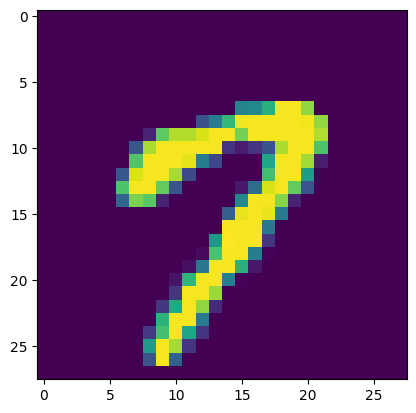

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[15])

In [ ]:
X_train = X_train.reshape(-1, 28*28) / 255.0

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
# สร้างโมเดล
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=input_dim))
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6935 - loss: 0.9181 - val_accuracy: 0.9517 - val_loss: 0.1773
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9254 - loss: 0.2759 - val_accuracy: 0.9600 - val_loss: 0.1409
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9438 - loss: 0.2115 - val_accuracy: 0.9657 - val_loss: 0.1266
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9549 - loss: 0.1699 - val_accuracy: 0.9678 - val_loss: 0.1279
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9614 - loss: 0.1444 - val_accuracy: 0.9691 - val_loss: 0.1222
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9662 - loss: 0.1320 - val_accuracy: 0.9707 - val_loss: 0.1148
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9707 - loss: 0.1176 - val_accuracy: 0.9730 - val_loss: 0.1128
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9687 - los

In [ ]:
X_test = X_test.reshape(-1, 28*28) / 255.0

In [ ]:
# ทำนายผลลัพธ์เป็น Class (0-9)
y_pred = model.predict(X_test)
predicted_classes = y_pred.argmax(axis=-1)  # แปลงจาก Probability เป็น Class

# ดูผลลัพธ์ตัวอย่าง
print("Predicted:", predicted_classes[1])
print("Actual:", y_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 2
Actual: 2


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.1816
Test Accuracy: 0.9813


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14675843715667725
Test accuracy: 0.9812999963760376


In [ ]:
model.save('MNIT_model.h5')